<a href="https://colab.research.google.com/github/Ben-069/GIS-Public-Sector/blob/main/PSOXBenitoOrtega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [3]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [4]:
#!python --version
gpd.__version__

'1.0.1'

In [5]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O map-paraguay.zip https://docs.google.com/uc?id=1_U-qJpLcgue3uCwKoL1YOk8eY1yPsHb1&export=download
zip_ref = zipfile.ZipFile('map-paraguay.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
pryC0=gpd.read_file('/content/geoBoundaries-PRY-ADM0.shp') #load the shapefile with gpd as njC

<Axes: >

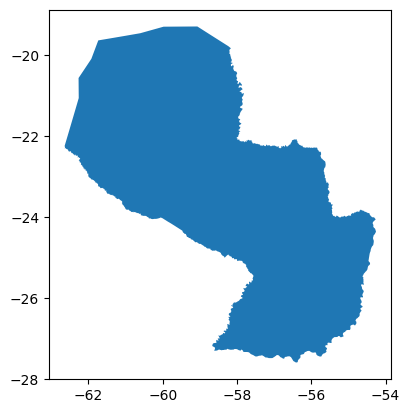

In [6]:
#make the map
pryC0.plot()

In [7]:
! wget -q -O paraguaymap.zip https://docs.google.com/uc?id=1w827-12TVbgmDuZzbRg2AEn0dgXUPL4V&export=download
zip_ref = zipfile.ZipFile('paraguaymap.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
pryC0=gpd.read_file('py.shp') #load the shapefile with gpd as njC

<Axes: >

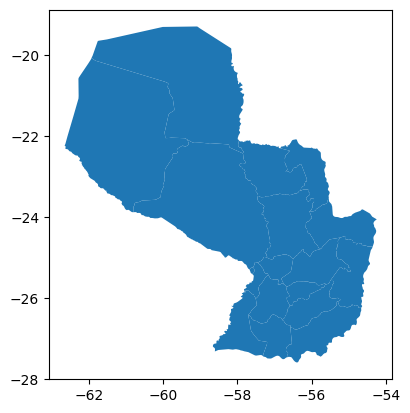

In [8]:
#make the map
pryC0.plot()

This is supposed to be an agricultural map That I got from this source: (https://gaez.fao.org/pages/agromaps)

In [9]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O agripy.zip https://docs.google.com/uc?id=1VD1HfR2OAl2HcYY3PPVzShk1HfkZzEMc&export=download
zip_ref = zipfile.ZipFile('agripy.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
agripyC0=gpd.read_file('/content/AgroMaps/LatinAmericaCaribbean/shapefiles/PRY/admin1/pry.shp') #load the shapefile with gpd as njC

<Axes: >

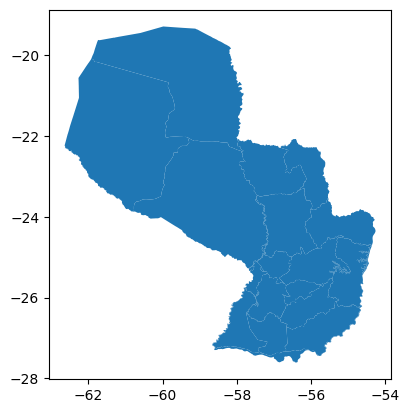

In [10]:
#make the map
agripyC0.plot()

In [11]:
! wget -q -O agripy.zip https://docs.google.com/uc?id=1VD1HfR2OAl2HcYY3PPVzShk1HfkZzEMc&export=download
zip_ref = zipfile.ZipFile('agripy.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
agripyC0=gpd.read_file('/content/AgroMaps/LatinAmericaCaribbean/shapefiles/PRY/admin1/pry.shp')

In [14]:
agripyC0.dtypes

,0
UNCODEOR,float64
CNTNAME3,object
COUNTRY_NA,object
CNTCODE_,float64
NAME1_,object
PCODE,object
COMMENTS_,object
geometry,geometry


In [13]:
agripyC0.head(2)

,UNCODEOR,CNTNAME3,COUNTRY_NA,CNTCODE_,NAME1_,PCODE,COMMENTS_,geometry
0,600.0,PRY,Paraguay,169.0,Alto Paraguay,PRY001,None,"POLYGON ((-59.32327 -22.03911, -59.33871 -22.0..."
1,600.0,PRY,Paraguay,169.0,Alto Parana,PRY002,None,"POLYGON ((-55.13984 -24.49315, -55.13925 -24.4..."


In [12]:
#keep it simple!
agripyC0=agripyC0[['COUNTRY_NA','CNTCODE_','NAME1_','PCODE','geometry']]

In [13]:
agripyC0.plot

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:687: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 1.
  self._classify()


<Axes: >

[]

[]

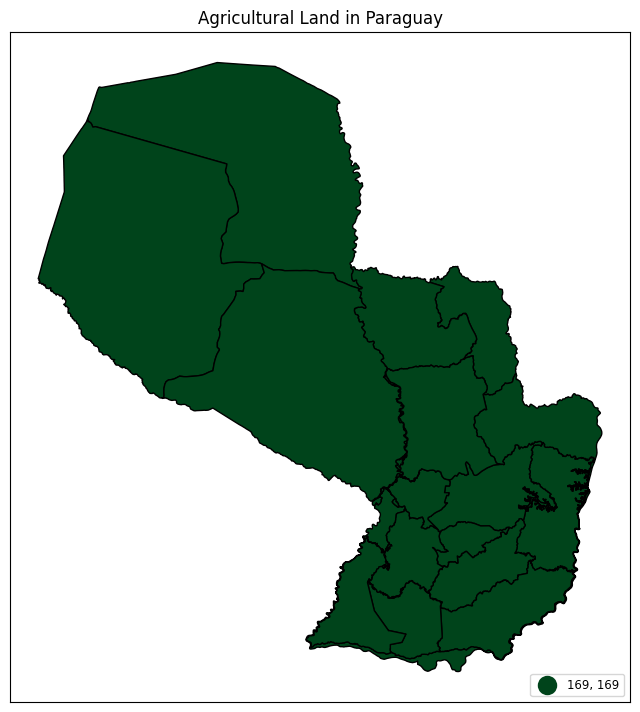

In [18]:
#first thematic map! lets unpack options esp fmt for dec pts; more later sec 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(8,10))
agripyC0.plot(ax=ax,column='CNTCODE_',legend=True,cmap='Greens_r',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Agricultural Land in Paraguay")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

Example 2

In [17]:
! wget -q -O agripy.zip https://docs.google.com/uc?id=1VD1HfR2OAl2HcYY3PPVzShk1HfkZzEMc&export=download
zip_ref = zipfile.ZipFile('agripy.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
agripyC0=gpd.read_file('/content/AgroMaps/LatinAmericaCaribbean/shapefiles/PRY/admin1/pry.shp')

In [16]:
agripyC0.dtypes

,0
COUNTRY_NA,object
CNTCODE_,float64
NAME1_,object
PCODE,object
geometry,geometry


In [15]:
agripyC0.head(2)

,COUNTRY_NA,CNTCODE_,NAME1_,PCODE,geometry
0,Paraguay,169.0,Alto Paraguay,PRY001,"POLYGON ((-59.32327 -22.03911, -59.33871 -22.0..."
1,Paraguay,169.0,Alto Parana,PRY002,"POLYGON ((-55.13984 -24.49315, -55.13925 -24.4..."


In [18]:
agripyC0['enr'] = agripyC0['UNCODEOR'].astype(float)

<Axes: >

<Axes: >

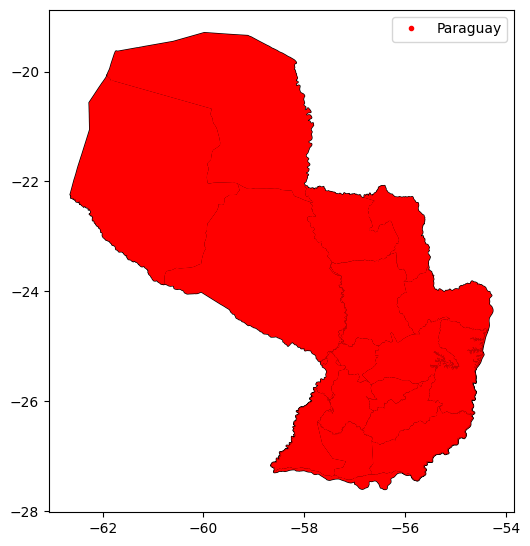

In [23]:
#and now overlay: just use plot fn twice; remember: most maps are layered
fig, ax = plt.subplots(1, figsize=(6,10))
agripyC0.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
agripyC0.plot(ax=ax, marker='o', color='red', markersize=10,legend=True)
#col.plot(column='enr',markersize=50,legend=True,cmap='RdYlGn_r',scheme='QUANTILES',k=5,ax=ax)
#ax.set_title('Watersheds by area ($mi^2$)')

#custom legend
#https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
#import matplotlib.patches as mpatches
#red_patch = mpatches.Patch(color='red', label='The red data')
from matplotlib.lines import Line2D
point = Line2D([0], [0], label='Paraguay', marker='o', markersize=3,
         markeredgecolor='r', markerfacecolor='r', linestyle='')
plt.legend(handles=[point])

PARAGUAY YUCA PRODUCTION
https://drive.google.com/file/d/1oDCh9FfA3M8X48r4CUJpJb-AEx1RFTjW/view?usp=drive_link

In [19]:
papapy=pd.read_excel('https://docs.google.com/uc?id=1k-osFo8Jrx84omMmw6jXDt57yXEO-s4I&export=download', header=4)

In [20]:
papapy.head(17)

,Unnamed: 0,Desagregaciones,Año,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,2012,2013,2014,2015,2016,2017.0,2018.0,2019.0,2020.0,2021.0,2022
1,NaN,Total país,3840,3500,3600,3497,3625,3760.0,3851.0,3867.0,3983.0,4089.0,-
2,NaN,Departamentos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Concepción,42,38,34,43,45,47.0,48.0,47.0,48.0,49.0,-
4,NaN,San Pedro,26,23.5,25,29,30,31.0,32.0,39.0,41.0,42.0,-
5,NaN,Cordillera,57,51.5,55,61,63,65.0,67.0,73.0,75.0,78.0,-
6,NaN,Guairá,11,10,15,15,16,17.0,17.0,35.0,36.0,37.0,-
7,NaN,Caaguazú,18,17,18,25,26,27.0,28.0,33.0,34.0,35.0,-
8,NaN,Caazapá,17,16,20,20,21,22.0,23.0,22.0,23.0,24.0,-
9,NaN,Itapúa,90,82,86,103,106,110.0,113.0,122.0,126.0,129.0,-


In [21]:
papapy1=papapy[["Desagregaciones","Unnamed: 11"]]

In [22]:
papapy1.head(10)

,Desagregaciones,Unnamed: 11
0,NaN,2021.0
1,Total país,4089.0
2,Departamentos,NaN
3,Concepción,49.0
4,San Pedro,42.0
5,Cordillera,78.0
6,Guairá,37.0
7,Caaguazú,35.0
8,Caazapá,24.0
9,Itapúa,129.0


In [23]:
papapy2=papapy1.drop([0,1,2])

In [24]:
papapy2.head(25)

,Desagregaciones,Unnamed: 11
3,Concepción,49.0
4,San Pedro,42.0
5,Cordillera,78.0
6,Guairá,37.0
7,Caaguazú,35.0
8,Caazapá,24.0
9,Itapúa,129.0
10,Misiones,30.0
11,Paraguarí,3407.0
12,Alto Paraná,188.0


In [25]:
papapy2.dtypes

,0
Desagregaciones,object
Unnamed: 11,float64


In [26]:
agripyC0.columns

Index(['UNCODEOR', 'CNTNAME3', 'COUNTRY_NA', 'CNTCODE_', 'NAME1_', 'PCODE',
       'COMMENTS_', 'geometry', 'enr'],
      dtype='object')

In [27]:
agripyC0["NAME1_"]

,NAME1_
0,Alto Paraguay
1,Alto Parana
2,Amambay
3,Asuncion
4,Boqueron
5,Caaguazu
6,Caazapa
7,Canindeyu
8,Central
9,Concepcion


In [28]:
#Code Suggested by AI (Gemini)
papapy2.iloc[17, papapy2.columns.get_loc('Desagregaciones')] = 'Presidente Hayes'

In [29]:
papapy2.iloc[3, papapy2.columns.get_loc('Desagregaciones')] = 'Concepcion'

In [30]:
papapy2.iloc[6, papapy2.columns.get_loc('Desagregaciones')] = 'Guaira'

In [31]:
papapy2.iloc[7, papapy2.columns.get_loc('Desagregaciones')] = 'Caaguazu'

In [32]:
papapy2.iloc[8, papapy2.columns.get_loc('Desagregaciones')] = 'Caazapa'

In [33]:
papapy2.iloc[9, papapy2.columns.get_loc('Desagregaciones')] = 'Itapua'

In [34]:
papapy2.iloc[11, papapy2.columns.get_loc('Desagregaciones')] = 'Paraguari'

In [35]:
papapy2.iloc[12, papapy2.columns.get_loc('Desagregaciones')] = 'Alto Parana'

In [36]:
papapy2.iloc[14, papapy2.columns.get_loc('Desagregaciones')] = 'Neembucu'

In [37]:
papapy2.iloc[16, papapy2.columns.get_loc('Desagregaciones')] = 'Canindeyu'

In [38]:
papapy2.iloc[18, papapy2.columns.get_loc('Desagregaciones')] = 'Boqueron'

In [39]:
papapy2.iloc[19, papapy2.columns.get_loc('Desagregaciones')] = 'Alto Paraguay'

In [40]:
papapy2.head(20)

,Desagregaciones,Unnamed: 11
3,Concepción,49.0
4,San Pedro,42.0
5,Cordillera,78.0
6,Concepcion,37.0
7,Caaguazú,35.0
8,Caazapá,24.0
9,Guaira,129.0
10,Caaguazu,30.0
11,Caazapa,3407.0
12,Itapua,188.0


In [96]:
papapy3 = pd.merge(agripyC0, papapy2, on='Desagregaciones',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
papapy3[['Desagregaciones','Unnamed: 11','_merge']] #all good, NEW JERSEY expected not to merge

KeyError: 'Desagregaciones'